In [226]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [227]:
REPLICATION = True

file_path_add = ''
if REPLICATION:
    file_path_add = 'replication/'

### Loading the results

In [316]:
wave = 7


wvs_mcm = pd.read_csv(f'../data/{file_path_add}wvs_w{wave}_mcm.csv')
wvs_mistral = pd.read_csv(f'../data/{file_path_add}wvs_w7_mistral.csv')
#wvs_gpt3_token_pairs = pd.read_csv('../data/wvs_w7_gpt3_token_pairs.csv')
wvs_gpt2 = pd.read_csv(f'../data/{file_path_add}wvs_w7_gpt2_token_pairs_in.csv')
wvs_gpt2_universal = wvs_gpt2.loc[wvs_gpt2.country == 'universal']
uni_wvs_mistral = pd.read_csv('../data/universal_wvs_w7_mistral.csv')


pew_mcm = pd.read_csv(f'../data/{file_path_add}pew_mcm.csv')
pew_mistral = pd.read_csv(f'../data/{file_path_add}pew_mistral.csv')
#pew_gpt3_token_pairs = pd.read_csv('../data/pew_gpt3_token_pairs.csv')
pew_gpt2 = pd.read_csv(f'../data/{file_path_add}pew_gpt2_token_pairs.csv')
uni_pew_mistral = pd.read_csv('../data/universal_pew_mistral.csv')


In [229]:
list_rows = []

SBERT

In [317]:

wvs_mcm_nan_removed = wvs_mcm.loc[~pd.isna(wvs_mcm.wvs_score)]
r, p = scipy.stats.pearsonr(wvs_mcm_nan_removed['wvs_score'], wvs_mcm_nan_removed['universal_mcm_score'])
row = {'model': 'SBERT', 'r': r, 'p':p, 'dataset': 'WVS', 'n' : len(wvs_mcm_nan_removed['wvs_score'])}
list_rows.append(row)

r, p = scipy.stats.pearsonr(pew_mcm['pew_score'], pew_mcm['universal_mcm_score'])
row = {'model': 'SBERT', 'r': r, 'p':p, 'dataset': 'PEW', 'n': len(pew_mcm['pew_score'])}
list_rows.append(row)


GPT3-QA

In [231]:
""" wvs_gpt3 = wvs_gpt3.loc[~pd.isna(wvs_gpt3.wvs_score)]
uni_wvs_gp3 = uni_wvs_gp3.loc[~pd.isna(uni_wvs_gp3['wvs_score'])]
scipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])
r, p = scipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])
row = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'WVS','n':len(uni_wvs_gp3['wvs_score'])}
list_rows.append(row)


r, p = scipy.stats.pearsonr(uni_pew_gpt['pew_score'], uni_pew_gpt['gpt3_score_mean'])
row = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'PEW', 'n':len(uni_pew_gpt['pew_score'])}
list_rows.append(row) """

" wvs_gpt3 = wvs_gpt3.loc[~pd.isna(wvs_gpt3.wvs_score)]\nuni_wvs_gp3 = uni_wvs_gp3.loc[~pd.isna(uni_wvs_gp3['wvs_score'])]\nscipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])\nr, p = scipy.stats.pearsonr(uni_wvs_gp3['wvs_score'], uni_wvs_gp3['gpt3_score_mean'])\nrow = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'WVS','n':len(uni_wvs_gp3['wvs_score'])}\nlist_rows.append(row)\n\n\nr, p = scipy.stats.pearsonr(uni_pew_gpt['pew_score'], uni_pew_gpt['gpt3_score_mean'])\nrow = {'model': 'GPT3-QA', 'r': r, 'p':p, 'dataset': 'PEW', 'n':len(uni_pew_gpt['pew_score'])}\nlist_rows.append(row) "

GPT3-PROBS

In [232]:
""" wvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] != 'universal']
wvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs_cultural.loc[~pd.isna(wvs_gpt3_token_pairs_cultural['wvs_score'])]
wvs_gpt3_token_pairs_universal = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] == 'universal']

wvs_gpt3_token_pairs_cultural['universal log prob difference'] = \
[float(wvs_gpt3_token_pairs_universal.loc[wvs_gpt3_token_pairs_universal.topic == t]['log prob difference']) for t in list(wvs_gpt3_token_pairs_cultural.topic)]
r, p = scipy.stats.pearsonr(wvs_gpt3_token_pairs_cultural['wvs_score'], wvs_gpt3_token_pairs_cultural['universal log prob difference'])
row = {'model': 'GPT3-PROBS', 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt3_token_pairs_cultural['wvs_score'])}
list_rows.append(row)


universal_pew_gpt3_token_pairs = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country == 'universal']
pew_gpt3_token_pairs_cultural = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country != 'universal']
pew_gpt3_token_pairs_cultural['universal log prob difference'] = \
[float(universal_pew_gpt3_token_pairs.loc[universal_pew_gpt3_token_pairs.topic == t]['log prob difference']) for t in list(pew_gpt3_token_pairs_cultural.topic)]
r, p = scipy.stats.pearsonr(pew_gpt3_token_pairs_cultural['pew_score'], pew_gpt3_token_pairs_cultural['universal log prob difference'])
row = {'model': 'GPT3-PROBS', 'r': r, 'p':p, 'dataset': 'PEW','n':len(pew_gpt3_token_pairs_cultural['pew_score'])}
list_rows.append(row)
 """

" wvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] != 'universal']\nwvs_gpt3_token_pairs_cultural = wvs_gpt3_token_pairs_cultural.loc[~pd.isna(wvs_gpt3_token_pairs_cultural['wvs_score'])]\nwvs_gpt3_token_pairs_universal = wvs_gpt3_token_pairs.loc[wvs_gpt3_token_pairs['country'] == 'universal']\n\nwvs_gpt3_token_pairs_cultural['universal log prob difference'] = [float(wvs_gpt3_token_pairs_universal.loc[wvs_gpt3_token_pairs_universal.topic == t]['log prob difference']) for t in list(wvs_gpt3_token_pairs_cultural.topic)]\nr, p = scipy.stats.pearsonr(wvs_gpt3_token_pairs_cultural['wvs_score'], wvs_gpt3_token_pairs_cultural['universal log prob difference'])\nrow = {'model': 'GPT3-PROBS', 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt3_token_pairs_cultural['wvs_score'])}\nlist_rows.append(row)\n\n\nuniversal_pew_gpt3_token_pairs = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country == 'universal']\npew_gpt3_token_pairs_cultural = pew_gpt3_token_pair

GPT2

In [318]:
wvs_gpt2 = wvs_gpt2.loc[~pd.isna(wvs_gpt2.wvs_score)]
wvs_gpt2_cultural = wvs_gpt2.loc[wvs_gpt2['country'] != 'universal']
wvs_gpt2_cultural['universal log prob difference'] = \
[float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]['log prob difference']) for t in list(wvs_gpt2_cultural.topic)]
r, p = scipy.stats.pearsonr(wvs_gpt2_cultural['wvs_score'], wvs_gpt2_cultural['universal log prob difference'])
row = {'model': 'GPT2', 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt2_cultural['wvs_score'])}
list_rows.append(row)

C:\Users\ajay_\AppData\Local\Temp\ipykernel_15556\2250375657.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  [float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]['log prob difference']) for t in list(wvs_gpt2_cultural.topic)]


In [321]:
models = ['gpt2', 'gpt2-medium','gpt2-large']
countries = list(wvs_mcm.country.unique())
for model in models:
    wvs_gpt2 = pd.read_csv(f'../data/{file_path_add}wvs_w7_{model}_token_pairs_in.csv')
    wvs_gpt2_universal = wvs_gpt2.loc[wvs_gpt2.country == 'universal']
    
    wvs_gpt2 = wvs_gpt2.loc[~pd.isna(wvs_gpt2.wvs_score)]
    wvs_gpt2_cultural = wvs_gpt2.loc[wvs_gpt2['country'] != 'universal']
    
    wvs_gpt2_cultural['universal log prob difference'] = \
    [float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]\
           ['log prob difference'].sample()) for t in list(wvs_gpt2_cultural.topic)]
    
    
    
    r, p = scipy.stats.pearsonr(wvs_gpt2_cultural['wvs_score'], 
                                wvs_gpt2_cultural['universal log prob difference'])
    
    row = {'model': model.upper(), 'r': r, 'p':p, 'dataset': 'WVS','n':len(wvs_gpt2_cultural['wvs_score'])}
    list_rows.append(row)
    
    
    pew_gpt2 = pd.read_csv(f'../data/{file_path_add}pew_{model}_token_pairs.csv')
    pew_gpt2_cultural = pew_gpt2.loc[pew_gpt2['country'] != 'universal']
     
    universal_pew_gpt2 = pew_gpt2.loc[pew_gpt2.country == 'universal']
    pew_gpt2_cultural['universal log prob difference'] = \
    [float(universal_pew_gpt2.loc[universal_pew_gpt2.topic == t]['log prob difference'].sample()) for t in list(pew_gpt2_cultural.topic)]
    r, p = scipy.stats.pearsonr(pew_gpt2_cultural['pew_score'], \
                                pew_gpt2_cultural['universal log prob difference'])
    
    row = {'model': model.upper(), 'r': r, 'p':p, 'dataset': 'PEW','n':len(pew_gpt2_cultural['pew_score'])}
    list_rows.append(row)



C:\Users\ajay_\AppData\Local\Temp\ipykernel_15556\2838506873.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  [float(wvs_gpt2_universal.loc[wvs_gpt2_universal.topic == t]\
C:\Users\ajay_\AppData\Local\Temp\ipykernel_15556\2838506873.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  [float(universal_pew_gpt2.loc[universal_pew_gpt2.topic == t]['log prob difference'].sample()) for t in list(pew_gpt2_cultural.topic)]
C:\Users\ajay_\AppData\Local\Temp\ipykernel_15556\2838506873.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_gpt2_cultural['u

# Homogeneous norms

SBERT

In [322]:
row = {'model':'SBERT','r' : 0.79, 'p': None, 'dataset' : 'Homogeneous norms'}
list_rows.append(row)

GPT3-QA

In [ ]:
""" gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT.csv')
r, p = scipy.stats.pearsonr(gpt3_amt['gpt3_score_mean'], gpt3_amt['user_score'])
row = {'model':'GPT3-QA','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score'])}
list_rows.append(row) """

" gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT.csv')\nr, p = scipy.stats.pearsonr(gpt3_amt['gpt3_score_mean'], gpt3_amt['user_score'])\nrow = {'model':'GPT3-QA','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score'])}\nlist_rows.append(row) "

GPT3-PROBS

In [ ]:
""" gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT_token_pairs.csv')
gpt3_amt = gpt3_amt.loc[~pd.isna(gpt3_amt['user_score_globalAMT'])]
r, p = scipy.stats.pearsonr(gpt3_amt['log prob difference'], gpt3_amt['user_score_globalAMT'])
row = {'model':'GPT3-PROBS','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score_globalAMT'])}
list_rows.append(row) """

" gpt3_amt = pd.read_csv(f'../data/MorT_actions/gpt3_mort_userstudy_globalAMT_token_pairs.csv')\ngpt3_amt = gpt3_amt.loc[~pd.isna(gpt3_amt['user_score_globalAMT'])]\nr, p = scipy.stats.pearsonr(gpt3_amt['log prob difference'], gpt3_amt['user_score_globalAMT'])\nrow = {'model':'GPT3-PROBS','r' : r, 'p': p, 'dataset' : 'Homogeneous norms','n':len(gpt3_amt['user_score_globalAMT'])}\nlist_rows.append(row) "

GPT2

In [323]:
def get_correlation(prompts,metric_name, user_study = 'globalAMT'):
    user_ratings = []
    perplexity = []
    text = []
    does = []
    for row in prompts:
        if f'user_score_{user_study}' not in row:
            continue
        user_score = row[f'user_score_{user_study}']

        text.append(row['aa'] + ' ' + row['aci'])
        user_ratings.append(user_score)
        perplexity.append(row[metric_name])
        if user_score >= 0:
            does.append(True)
        else:
            does.append(False)
    
    does_ids = [i for i in range(len(does)) if does[i] == True]
    donts_ids = [i for i in range(len(does)) if does[i] == False]
    user_ratings_does = np.array(user_ratings)[does_ids]
    perplexity_does = np.array(perplexity)[does_ids]

    user_ratings_donts = np.array(user_ratings)[donts_ids]
    perplexity_donts = np.array(perplexity)[donts_ids]
    
    return scipy.stats.pearsonr(user_ratings, perplexity), len(user_ratings)

   



In [326]:
for model in models:
    prompts = pickle.load(open(f'../data/{file_path_add}MoRT_actions/prompts_{model}_pair_logprob_userstudy_globalAMT_style_mv_at_end_use_last_token_True.p', 'rb'))
    (r, p),n = get_correlation(prompts, 'log prob difference')
    row = {'model':model.upper(),'r' : r, 'p': p, 'dataset' : 'Homogeneous norms',
          'n': n}
    list_rows.append(row)

In [327]:
df = pd.DataFrame(list_rows)


In [328]:
from statsmodels.stats.multitest import multipletests
df['p'] = multipletests(df['p'], method = 'bonferroni', alpha = 0.5)[1]
df['dataset'] = pd.Categorical(df['dataset'], ["Homogeneous norms", "WVS", "PEW"])
df = df.sort_values(['dataset'])
df

,model,r,p,dataset,n
15,GPT2-LARGE,0.761870,1.067123e-18,Homogeneous norms,100.0
28,GPT2,0.797926,8.830486e-22,Homogeneous norms,100.0
27,SBERT,0.790000,NaN,Homogeneous norms,NaN
29,GPT2-MEDIUM,0.787247,8.333184e-21,Homogeneous norms,100.0
14,GPT2-MEDIUM,0.787247,8.333184e-21,Homogeneous norms,100.0
13,GPT2,0.797926,8.830486e-22,Homogeneous norms,100.0
12,MISTRAL-QA,0.527619,5.256518e-07,Homogeneous norms,100.0
11,SBERT,0.790000,NaN,Homogeneous norms,NaN
30,GPT2-LARGE,0.761870,1.067123e-18,Homogeneous norms,100.0
9,GPT2-LARGE,0.226415,6.322249e-12,WVS,1028.0


C:\Users\ajay_\AppData\Local\Temp\ipykernel_15556\1379724283.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=30, labels = ['SBERT','GPT2','GPT2-MEDIUM','GPT2-LARGE','GPT3-QA','GPT3-PROBS'],ha = 'right')


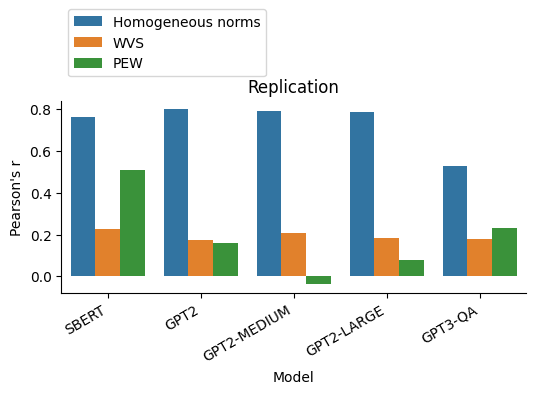

In [329]:

fig, axes = plt.subplots(figsize = (6, 2.5))
g = sns.barplot(data = df, x = 'model', y = 'r',hue = 'dataset' )
g.set_xticklabels(rotation=30, labels = ['SBERT','GPT2','GPT2-MEDIUM','GPT2-LARGE','GPT3-QA','GPT3-PROBS'],ha = 'right')
g.set(xlabel="Model",ylabel="Pearson's r", title="Replication")
sns.despine(left = False)

    
g.legend(loc='center left', bbox_to_anchor=(0,1.3))
plt.show()